<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Projects/blob/main/Diagnosis_of_diabetes_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Exploration of dataset

In [7]:
URL = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(URL, index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

##Ustunlar

**Pregnancies**: *homilador bo'lish soni*

**Glucose**: *glyukozaga test natijasi*

**BloodPressure**: *diastolik qon bosimi (mm Hg)*

**SkinThickness**: *Triceps teri burmasining qalinligi (mm)*

**Insulin**: *2 soatlik sarum insulini (mu U/ml)*

**BMI**: *Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)*

**DiabetesPedigreeFunction**: *diabetning naslchilik funktsiyasi*

**Age**: *Yosh (yil)*

**Outcome**: *Class (0 - diabet yo'q, 1 - diabet)*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Outcome'].value_counts() # is not normalized

,count
Outcome,
0,500
1,268


In [12]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = "coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
df.corrwith(df['Outcome'], numeric_only=True).abs().sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


#There is one thing

##First we will do machine learing with not normalized data

**ML Preparation**

In [14]:
from sklearn.preprocessing import StandardScaler
X = df[['Glucose', "BMI", "Age", 'Pregnancies']].values
y = df['Outcome']

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {"n_neighbors" : np.arange(1,25)}
knn_gs = GridSearchCV(estimator=knn, param_grid=params, cv = 5)
knn_gs.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [16]:
scores = knn_gs.cv_results_['rank_test_score']

In [17]:
knn_gs.best_score_

np.float64(0.774849333672863)

In [18]:
knn_gs.best_params_

{'n_neighbors': np.int64(17)}

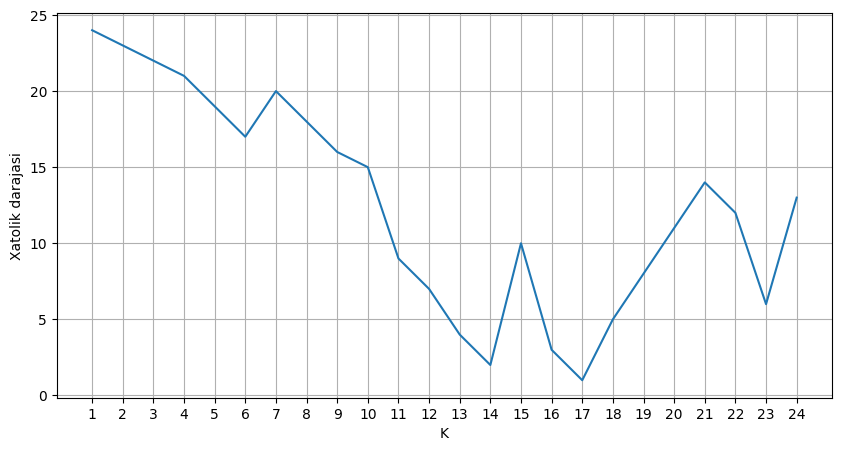

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(params['n_neighbors'], knn_gs.cv_results_['rank_test_score'])
plt.xticks(params["n_neighbors"])
plt.grid()
plt.xlabel("K")
plt.ylabel("Xatolik darajasi")
plt.show()

#Machine Learning

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)

In [21]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [22]:
y_predict = knn.predict(X_test)

In [23]:
from sklearn.metrics import jaccard_score
score = jaccard_score(y_test, y_predict)
score

np.float64(0.5652173913043478)

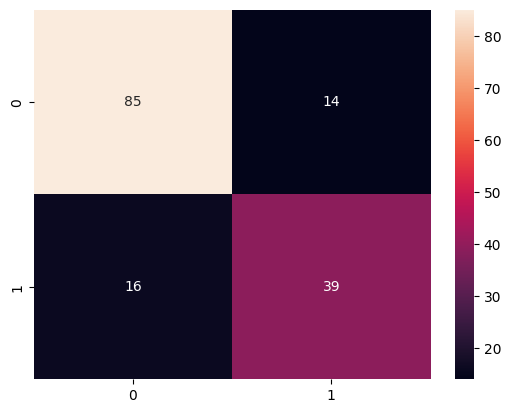

In [24]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuraccy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print(f'Accuraccy score : {accuraccy}\nPrecision : {precision}\nRecall : {recall}\nF1 score : {f1}')

Accuraccy score : 0.8051948051948052
Precision : 0.7358490566037735
Recall : 0.7090909090909091
F1 score : 0.7222222222222222


In [26]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.74      0.71      0.72        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.79       154
weighted avg       0.80      0.81      0.80       154



#Cross validation

In [28]:
from sklearn.model_selection import cross_val_predict

cross_val_score = cross_val_predict(estimator=knn, X = X, y = y, cv = 5)

In [31]:
report = classification_report(y,cross_val_score)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       500
           1       0.71      0.61      0.65       268

    accuracy                           0.77       768
   macro avg       0.76      0.74      0.74       768
weighted avg       0.77      0.77      0.77       768



#Second trainging with normalized data

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df_zero = df[df['Outcome'] == 0][:268]
df_one = df[df['Outcome'] == 1][:268]
df_norm = pd.concat([df_zero,df_one])


In [56]:
df_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [57]:
df_norm['Outcome'].value_counts()

,count
Outcome,
0,268
1,268


In [58]:
corr_matrix = df_norm.corr().abs()
corr_matrix.style.background_gradient(cmap = "coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118142,0.122665,0.062135,0.052787,0.029162,0.042092,0.545457,0.238184
Glucose,0.118142,1.000000,0.114446,0.050369,0.336559,0.234683,0.131503,0.269123,0.464262
BloodPressure,0.122665,0.114446,1.000000,0.209738,0.098941,0.260359,0.039378,0.249943,0.073010
SkinThickness,0.062135,0.050369,0.209738,1.000000,0.437843,0.375025,0.212793,0.091733,0.073309
Insulin,0.052787,0.336559,0.098941,0.437843,1.000000,0.182586,0.189713,0.002599,0.121072
BMI,0.029162,0.234683,0.260359,0.375025,0.182586,1.000000,0.136191,0.070074,0.315288
DiabetesPedigreeFunction,0.042092,0.131503,0.039378,0.212793,0.189713,0.136191,1.000000,0.011150,0.161766
Age,0.545457,0.269123,0.249943,0.091733,0.002599,0.070074,0.011150,1.000000,0.285012
Outcome,0.238184,0.464262,0.073010,0.073309,0.121072,0.315288,0.161766,0.285012,1.000000


In [59]:
df.corrwith(df['Outcome'], numeric_only=True).abs().sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [91]:
X = df_norm[['Glucose', 'BMI', 'Age', 'Pregnancies']].values
y = df_norm['Outcome']

In [92]:
X = scaler.fit_transform(X)

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {"n_neighbors" : np.arange(1, 25)}
knn_gs = GridSearchCV(estimator=knn, param_grid=params, cv = 5)
knn_gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [94]:
scores = knn_gs.cv_results_['rank_test_score']

In [95]:
knn_gs.best_score_ # best score = 75.197

np.float64(0.7519730010384216)

In [96]:
knn_gs.best_params_ # best k = 13

{'n_neighbors': np.int64(13)}

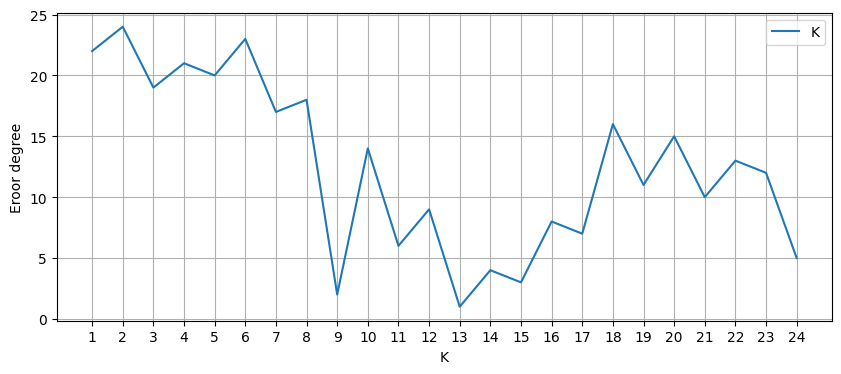

In [112]:
plt.figure(figsize = (10,4))
plt.plot(params['n_neighbors'], scores)
plt.xticks(params['n_neighbors'])
plt.xlabel("K")
plt.ylabel("Eroor degree")
plt.legend('K')
plt.grid()
plt.show()

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)

from sklearn.model_selection import StratifiedShuffleSplit # splitting data normalized by column named 'Outcome'
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=12)

for train_index , test_index in strat_split.split(df_norm, df_norm['Outcome']):
    train_set = df_norm.iloc[train_index]
    test_set = df_norm.iloc[test_index]



X_train = scaler.fit_transform(train_set[['Glucose', 'BMI', 'Age', 'Pregnancies']].values)
X_test = scaler.transform(test_set[['Glucose', 'BMI', 'Age', 'Pregnancies']].values)
y_train = train_set['Outcome']
y_test = test_set['Outcome']

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [171]:
y_predict = knn.predict(X_test)

In [172]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.77      0.89      0.83        27

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



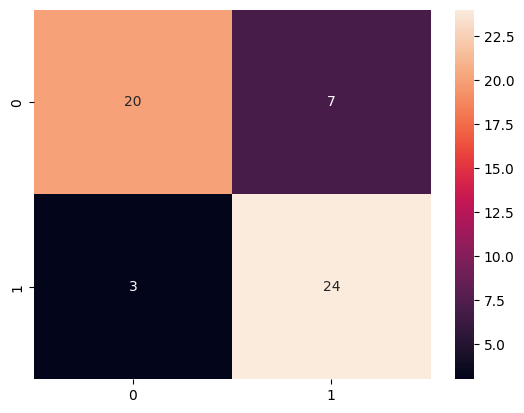

In [173]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [174]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

from sklearn.metrics import classification_report
report = classification_report(y,scores)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       268
           1       0.74      0.78      0.76       268

    accuracy                           0.75       536
   macro avg       0.75      0.75      0.75       536
weighted avg       0.75      0.75      0.75       536

